In [28]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import scipy.optimize as opt
import matplotlib.pyplot as plt
df = pd.read_csv('data/sick.txt',sep=',', skiprows = 1, names=["sick","age","children","avgtemp_winter"])
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [6]:
df_ = df.loc[:9].copy()
df_

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90
5,0.62,44.67,1.20,68.60
6,1.06,27.92,1.84,29.42
7,1.29,44.87,2.40,50.49
8,1.05,53.68,1.65,55.12
9,1.18,39.63,1.96,37.30


In [15]:
def norm_lik(sick,age,children,avgtemp_winter,beta0,beta1,beta2,beta3,sigma):
    ep = sick - beta0 - beta1 * age - beta2 * children - beta3 * avgtemp_winter
    pdf_vals = (1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (ep - 0)**2 / (2 * sigma**2)))
    log_pdf_vals = np.log(pdf_vals)
    log_sum = log_pdf_vals.sum()
    return log_sum

In [16]:
sick, age, children, temp = df["sick"], df["age"], df["children"], df["avgtemp_winter"]
norm_lik(sick,age,children,temp,1,0,0,0,0.5)

-146.37547052894547

In [19]:
sick, age, children, temp = df["sick"], df["age"], df["children"], df["avgtemp_winter"]
sig = sick.std()
sig

0.5042224124392232

In [20]:
def crit_new(params,*args):
    beta0,beta1,beta2,beta3,sigma = params
    sick,age,children,temp = args
    log_mle = norm_lik(sick,age,child,temp,beta0,beta1,beta2,beta3,abs(sigma))
    return -log_mle

In [25]:


params_init = np.array([1,0,0,0,sig])
mle_agrs_init = (sick, age, children, temp)
result = opt.minimize(crit_new, params_init, args = mle_agrs_init)
beta0_mle,beta1_mle,beta2_mle,beta3_mle,sigma_mle = result.x
print("beta0 =",beta0_mle)
print("beta1 =",beta1_mle)
print("beta2 =",beta2_mle)
print("beta3 =",beta3_mle)
print("sigma =",sigma_mle)

result

/Users/zhenyuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


beta0 = 0.2516461439097104
beta1 = 0.012933345572030876
beta2 = 0.4005020423853474
beta3 = -0.00999166192686597
sigma = 0.00301773538018628


      fun: -876.8650484867442
 hess_inv: array([[ 9.91259681e-07,  7.51745259e-09, -1.61449981e-07,
        -2.21873828e-08, -3.02411022e-10],
       [ 7.51745259e-09,  4.36559374e-09, -4.00183674e-08,
        -2.69684300e-09,  1.60243700e-10],
       [-1.61449981e-07, -4.00183674e-08,  4.15949015e-07,
         2.49045152e-08, -2.54690637e-09],
       [-2.21873828e-08, -2.69684300e-09,  2.49045152e-08,
         2.05530488e-09, -8.14004542e-11],
       [-3.02411022e-10,  1.60243700e-10, -2.54690637e-09,
        -8.14004542e-11,  2.30419784e-08]])
      jac: array([ 1.26649475, 55.33101654,  1.05096436, 78.84306335,  2.33837891])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1013
      nit: 36
     njev: 142
   status: 2
  success: False
        x: array([ 0.25164614,  0.01293335,  0.40050204, -0.00999166,  0.00301774])

In [25]:
import sympy as sy
import numpy as np
import math
import matplotlib.pyplot as plt

In [26]:
sigma = 1.8
x = sy.symbols('x')
mu_x = x**(-sigma)
mu_x
mu = sy.lambdify(x,mu_x,'numpy')
xvals = np.linspace(0.7,5,100)
result = mu(xvals)

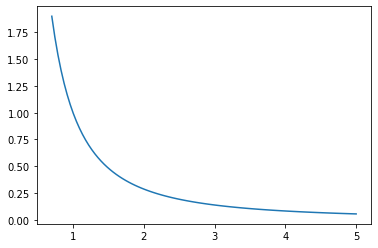

In [27]:
plt.plot(xvals,result)
plt.show()

In [28]:
from sympy.abc import r,w,a,b,t
def dMu_c(bt,rt,wt,bt1,sigma):
    f = sy.lambdify((a,b,r,w,t), sy.diff(((1+b)*a + r - w)**(-t),a))
    return f(bt,rt,wt,bt1,sigma)
dMu_c(bt_,rt_,wt_,bt1_,sigma_)

-1.8592010790841615

In [52]:
rt = sy.symbols('r_t')
bt = sy.symbols('b_t')
wt = sy.symbols('w_t')
bt1 = sy.symbols('b_t+1')
sigma = sy.symbols('sigma')

ux = sy.diff(((1+rt)*bt + wt - bt1)**(-sigma),bt)
#-(sigma*(rt+1)*(bt*(rt+1)-bt1+wt)**(-sigma))/(bt*(rt+1)-bt1 +wt)

In [30]:
def dMu_c(bt,rt,wt,bt1,sigma):
    u_x = -(sigma*(rt+1)*(bt*(rt+1)-bt1+wt)**(-sigma))/(bt*(rt+1)-bt1 +wt)
    return u_x

bt_ = 3.3
rt_ = 0.03
bt1_ = 3.4
wt_ = 1
sigma_ =1.8

dMu_c(bt_,rt_,wt_,bt1_,sigma_)
    

-1.8592010790841615

In [39]:
def dMu_c_approx(bt,rt,wt,bt1,sigma,h):
    ux = (((1+rt)*(bt+h) + wt -bt1)**(-sigma) - ((1+rt)*(bt-h) + wt -bt1)**(-sigma))/(2*h1)
    return ux

_bt = 1
_rt = 0.04
_bt1 = 0.8
_wt = 1.2
_sigma =2.2
h1 = 0.001
h2 = 0.0001
print(dMu_c(_bt,_rt,_wt,_bt1,_sigma))
print(dMu_c_approx(_bt,_rt,_wt,_bt1,_sigma,h1))
print(dMu_c_approx(_bt,_rt,_wt,_bt1,_sigma,h2))

-0.7123542921746638
-0.7123551244865578
-0.07123543004969313


In [32]:
x = sy.symbols('x')
y = sy.symbols('y')
f = (2 * sy.pi * sy.cos(x*y)) 
f

2*pi*cos(x*y)

In [217]:
g = sy.lambdify((x,y), f)
g(2,3)

6.032927837471992